
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Importance)
* [Part 5: Final Prediction](#Part-5:-Final-Prediction)

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [565]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [566]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print ("Num of rows: " + str(df.shape[0])) # row count
print ("Num of columns: " + str(df.shape[1])) # col count

Num of rows: 891
Num of columns: 12


In [4]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# check the unique values for each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [567]:
# Get target variable
y = df['Survived']

In [568]:
# check the propotion of y = 1
print(y.sum() / len(y) * 100)

38.38383838383838


### Part 1.2:  Understand the features

In [10]:
# check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [569]:
# understand Numerical feature
# discrete/continuous
df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [12]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

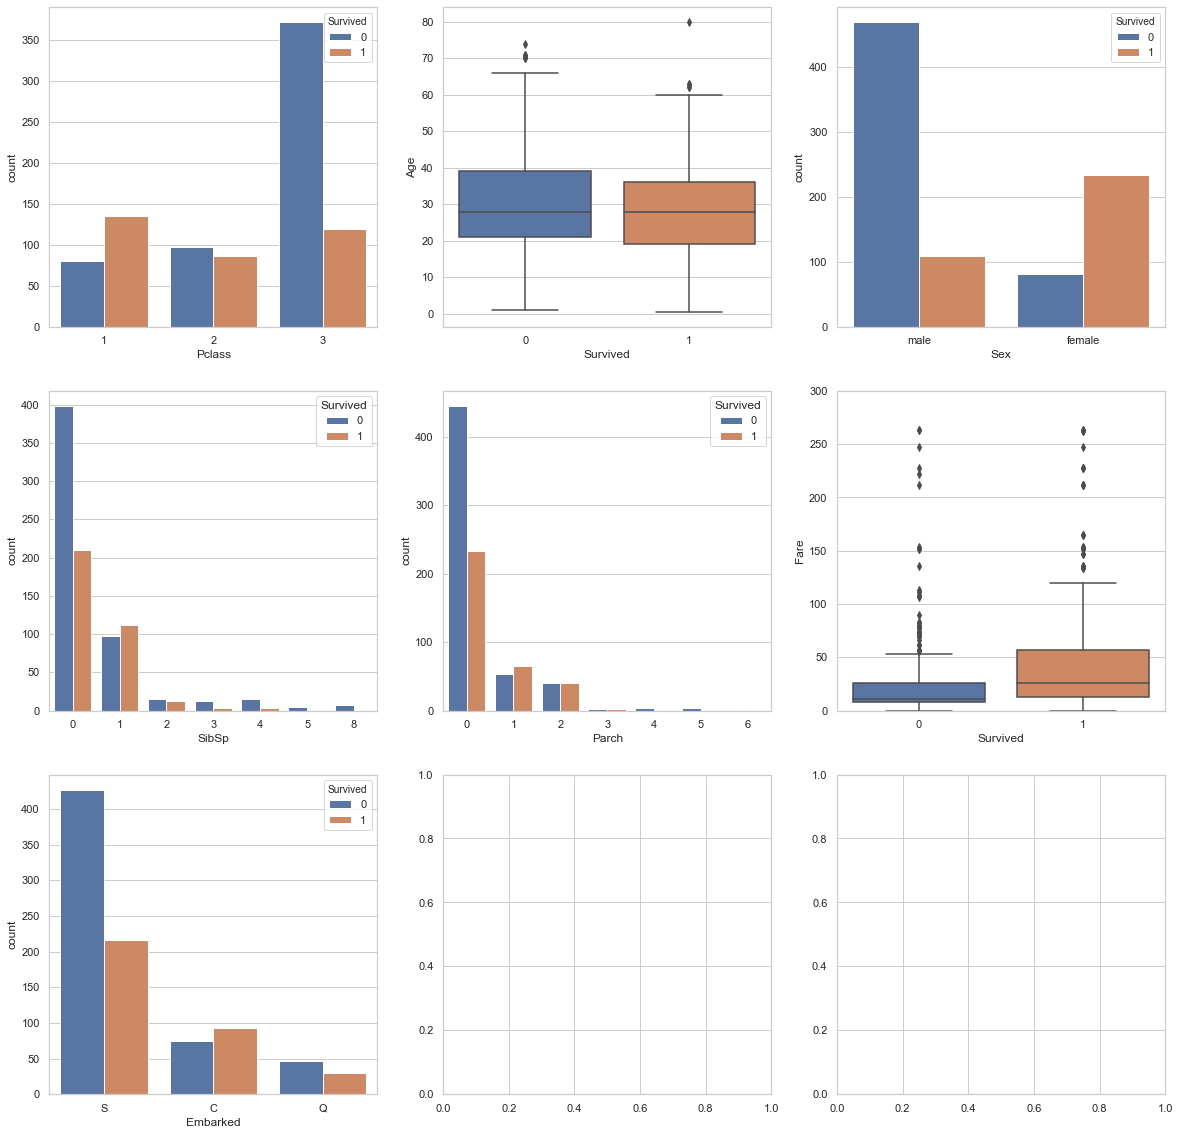

In [13]:
# feature exploration
sns.set(style="whitegrid")
_,axss = plt.subplots(3,3, figsize=[20,20])
plt1 = sns.countplot(x='Pclass', hue='Survived', data=df, ax=axss[0][0])
plt2 = sns.boxplot(x='Survived', y ='Age', data=df, ax=axss[0][1])
plt3 = sns.countplot(x='Sex', hue='Survived', data=df, ax=axss[0][2])
plt4 = sns.countplot(x='SibSp', hue='Survived', data=df, ax=axss[1][0])
plt4.legend(loc = 1, title = 'Survived')
plt5 = sns.countplot(x='Parch', hue='Survived', data=df, ax=axss[1][1])
plt5.legend(loc = 1, title = 'Survived')
plt6 = sns.boxplot(x='Survived', y ='Fare', data=df, ax=axss[1][2])
plt6.set(ylim=(0, 300))
plt7 = sns.countplot(x='Embarked', hue='Survived', data=df, ax=axss[2][0])


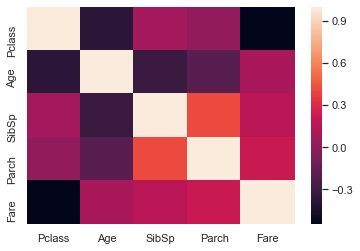

In [14]:
# correlations between features
corr_score = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [15]:
# check the actual values of correlations
corr_score

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


# Part 2: Feature Preprocessing

feature encoding, feature scaling

Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](https://contrib.scikit-learn.org/categorical-encoding/#category-encoders).

In [570]:
# for refreshing original dataframe
df = pd.read_csv('train.csv')

In [571]:
df['Family'] = df['SibSp'] + df['Parch']
df['is_Alone'] = (df['Family'] == 0).astype(int)

In [572]:
# categorize fare into groups
df['Fare_1'] = (df['Fare'] <= 7.99).astype(int)
df['Fare_2'] = ((df['Fare'] > 7.99) & (df['Fare'] <= 14.99)).astype(int)
df['Fare_3'] = ((df['Fare'] > 14.99) & (df['Fare'] <= 29.99)).astype(int)
df['Fare_4'] = ((df['Fare'] > 29.99) & (df['Fare'] <= 99.99)).astype(int)
df['Fare_5'] = ((df['Fare'] > 99.99) & (df['Fare'] <= 249.99)).astype(int)
df['Fare_6'] = (df['Fare'] > 249.99).astype(int)

In [573]:
# extract useful information from columns
# separate Cabin code and number
df['Ccode'] = df['Cabin'].str[0]

# for i in range(len(df)):
    # df['Cnumber'] = df['Cabin'].str[1:]

for i in range(len(df)):
    if df['Ccode'][i] == 'T':
        df['Ccode'][i] = np.nan

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [574]:
# separate Ticket code and number
Tcode = []
Tnumber = []
temp = []

for i in range(len(df)):
    temp.append(df['Ticket'][i].split())
    
for i in range(len(temp)):
    if len(temp[i]) == 1:
        temp[i] = [np.nan] + temp[i]
        
for i in range(len(temp)):
    Tcode.append(temp[i][0])
    Tnumber.append(temp[i][1])
    
# remove period in Ticket code
for i in range(len(Tcode)):
    if str(Tcode[i])[-1] == '.':
        Tcode[i] = Tcode[i][0:len(Tcode[i])-1]
    
df['Tcode'] = Tcode
# df['Tnumber'] = Tnumber

In [575]:
# separate information in Name
temp2 = []
first = []
suffix = []
last = []
other = []

for i in range(len(df)):
    temp2.append(df['Name'][i].split(',',1))
    
# capture last names
for i in range(len(temp2)):
    last.append(temp2[i][0])
    temp2[i].pop(0)
    
remain = pd.DataFrame(temp2)[0]
temp2 = []

for i in range(len(remain)):
    temp2.append(remain[i][1:].split('.',1))
    
# capture suffix
for i in range(len(temp2)):
    suffix.append(temp2[i][0])
    temp2[i].pop(0)
    
remain = pd.DataFrame(temp2)[0]
temp2 = []

for i in range(len(remain)):
    temp2.append(remain[i][1:].split('(',1))
    
# capture first names and other names
for i in range(len(temp2)):
    if len(temp2[i]) == 1:
        temp2[i] = temp2[i] + [None]
        
for i in range(len(temp2)):
    first.append(temp2[i][0])
    other.append(temp2[i][1] != None)
    
# df['Lname'] = last
# df['Fname'] = first
df['Oname'] = other
# df['Suffix'] = suffix

In [576]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_Alone,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Ccode,Tcode,Oname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,0,NaN,A/5,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,C,PC,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,NaN,STON/O2,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,C,NaN,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,NaN,NaN,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,1,0,1,0,0,0,0,NaN,NaN,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,0,0,0,1,0,0,E,NaN,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,0,1,0,0,0,NaN,NaN,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,1,0,0,0,0,NaN,NaN,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,0,0,1,0,0,NaN,NaN,True


In [577]:
# ordinal encoding
df['Sex'] = (df['Sex'] == 'male')
df['Sex'] = df['Sex'].astype(int)
df['Oname'] = df['Oname'].astype(int)

In [578]:
# group ticket code
for i in range(len(df)):
    if df['Tcode'][i] in ['A./5','A.5', 'A/S']:
        df['Tcode'][i] = 'A/5'
    elif df['Tcode'][i] in ['A4']:
        df['Tcode'][i] = 'A/4'
    elif df['Tcode'][i] in ['CA','C.A./SOTON']:
        df['Tcode'][i] = 'C.A'
    elif df['Tcode'][i] in ['S.C./A.4','S.C./PARIS','S.O./P.P','S.O.C','SC','SC/AH','SC/PARIS','SC/Paris','SCO/W','SO/C']:
        df['Tcode'][i] = 'S.C'
    elif df['Tcode'][i] in ['SOTON/O.Q','SOTON/O2','SOTON/OQ','STON/O','STON/O2']:
        df['Tcode'][i] = 'SOTON'
    elif df['Tcode'][i] in ['W./C', 'W/C']:
        df['Tcode'][i] = 'C'

for i in range(len(df)):    
    if df['Tcode'][i] not in ['A/4','A/5','PC','C.A','S.C','SOTON','C',np.nan]:
        df['Tcode'][i] = 'other'

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Haipeng

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

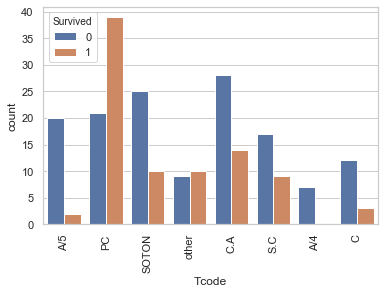

In [579]:
# check survival against ticket code
sns.countplot(x='Tcode', hue='Survived', data=df)
plt.xticks(rotation=90)

In [580]:
# data imputation (age, cabin, ticket, embarked)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# df["Age"].fillna(df["Age"].median(), inplace = True) *** not representative of the distribution
agecopy = df['Age'].copy()
m = df['Age'].median()
d = df['Age'].std()
age_is_null = df['Age'].isnull().sum()
rand_age = np.random.randint(m-d, m+d, size = age_is_null)
agecopy[np.isnan(agecopy)] = rand_age
df['Age'] = agecopy

df["Ccode"].fillna("No Record", inplace = True)
# df["Cnumber"].fillna("No Record", inplace = True)
df['Ccode'] = labelencoder.fit_transform(df['Ccode'])
# df['Cnumber'] = labelencoder.fit_transform(df['Cnumber'])

df["Tcode"].fillna("No Record", inplace = True)
# df["Tnumber"].fillna("No Record", inplace = True)
df['Tcode'] = labelencoder.fit_transform(df['Tcode'])
# df['Tnumber'] = labelencoder.fit_transform(df['Tnumber'])

# df['Lname'] = labelencoder.fit_transform(df['Lname'])
# df['Fname'] = labelencoder.fit_transform(df['Fname'])
# df['Suffix'] = labelencoder.fit_transform(df['Suffix'])

df["Embarked"].fillna('S', inplace = True) 

In [582]:
# categorize age into groups
df['Age_1'] = (df['Fare'] <= 18).astype(int)
df['Age_2'] = ((df['Fare'] > 18) & (df['Fare'] <= 28)).astype(int)
df['Age_3'] = ((df['Fare'] > 28) & (df['Fare'] <= 38)).astype(int)
df['Age_4'] = ((df['Fare'] > 38) & (df['Fare'] <= 58)).astype(int)
df['Age_5'] = (df['Fare'] > 58).astype(int)

In [583]:
# one hot encoding
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'], drop_first=True)

In [584]:
# delete columns that are less contributing
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age'], axis=1)

In [585]:
df.head(10)

,Survived,Sex,Family,is_Alone,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,...,Oname,Age_1,Age_2,Age_3,Age_4,Age_5,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
5,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,1,4,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8,1,0,2,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
9,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


# Part 3: Model Training and Result Evaluation

### Part 3.1: Scale and Split dataset

In [586]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 10% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,1:], y, test_size=0.1, stratify = y)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 801 observation with 21 features
test data has 90 observation with 21 features


In [587]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Part 3.2: Model Training and Selection

In [588]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [589]:
# Train the model
classifier_logistic.fit(X_train, y_train)

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [590]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1], dtype=int64)

In [591]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.7888888888888889

In [592]:
# Use 10-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[0.71604938 0.7654321  0.82716049 0.77777778 0.8        0.85
 0.775      0.75949367 0.79746835 0.78481013]
Model accuracy of Logistic Regression is 0.7853191904985153
[0.77777778 0.75308642 0.82716049 0.75308642 0.8125     0.775
 0.7375     0.78481013 0.87341772 0.81012658]
Model accuracy of KNN is 0.7904465541490857
[0.74074074 0.77777778 0.90123457 0.80246914 0.85       0.825
 0.7375     0.74683544 0.78481013 0.81012658]
Model accuracy of Random Forest is 0.7976494374120956


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\skl

In [593]:
from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=10)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\svm\

Model accuracy of SVM is: 0.7990715346147835


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [594]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [595]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
seed(1)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 1, 5, 10, 15)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10, 15),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [596]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.7915106117353309
Best parameters set:
C:0.1
penalty:l1


In [597]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [598]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[4,5,6,7,8,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(X_train, y_train)

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [599]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.7902621722846442
Best parameters set:
n_neighbors:5


In [600]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [601]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
from numpy.random import seed
seed(1)
parameters = {
    'n_estimators' : [45,50,55,60],
    'max_features' : ['auto', 'sqrt', 'log2']
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [602]:
# best number of trees
print_grid_search_metrics(Grid_RF)

Best score: 0.8077403245942572
Best parameters set:
max_features:auto
n_estimators:55


In [603]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

####Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [604]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Survived']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.8
precision is: 0.7297297297297297
recall is: 0.7714285714285715


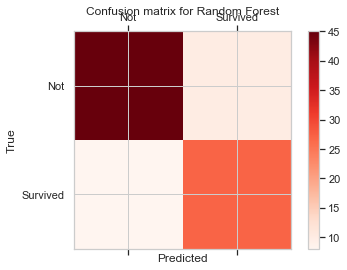

Logistic Regression
Accuracy is: 0.7666666666666667
precision is: 0.7058823529411765
recall is: 0.6857142857142857


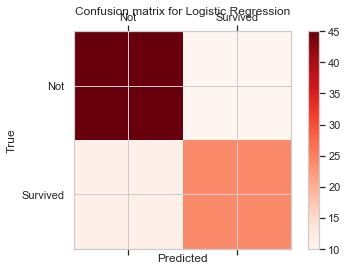

K nearest neighbor
Accuracy is: 0.8
precision is: 0.8148148148148148
recall is: 0.6285714285714286


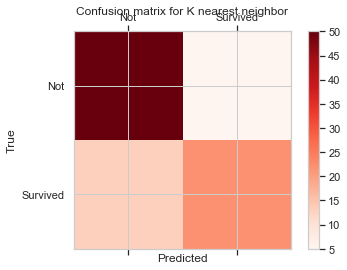

In [605]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

In [606]:
confusion_matrix(y_test,best_RF_model.predict(X_test))

array([[45, 10],
       [ 8, 27]], dtype=int64)

### Part 3.4: Model Evaluation - ROC & AUC

#### Part 3.4.1: ROC of RF Model

In [607]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [608]:
best_RF_model.predict_proba(X_test)

array([[0.82121212, 0.17878788],
       [0.92106453, 0.07893547],
       [0.88038961, 0.11961039],
       [0.16227273, 0.83772727],
       [0.90151515, 0.09848485],
       [0.94119773, 0.05880227],
       [0.94119773, 0.05880227],
       [0.83265467, 0.16734533],
       [0.22101489, 0.77898511],
       [0.32359307, 0.67640693],
       [0.90151515, 0.09848485],
       [0.22454545, 0.77545455],
       [0.73059885, 0.26940115],
       [0.17203463, 0.82796537],
       [0.03701299, 0.96298701],
       [0.98181818, 0.01818182],
       [0.90909091, 0.09090909],
       [0.64857143, 0.35142857],
       [0.77596949, 0.22403051],
       [0.78528139, 0.21471861],
       [0.14280696, 0.85719304],
       [0.8985336 , 0.1014664 ],
       [1.        , 0.        ],
       [0.36042452, 0.63957548],
       [0.99090909, 0.00909091],
       [0.07272727, 0.92727273],
       [1.        , 0.        ],
       [0.67545455, 0.32454545],
       [0.        , 1.        ],
       [0.96221745, 0.03778255],
       [0.

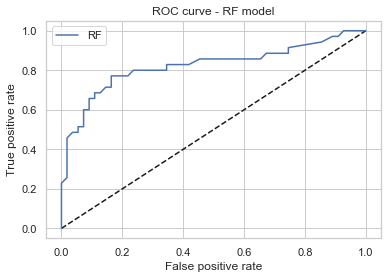

In [609]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [610]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.822857142857143

#### Part 3.4.1: ROC of LR Model

In [611]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [612]:
best_LR_model.predict_proba(X_test)

array([[0.92977466, 0.07022534],
       [0.78997063, 0.21002937],
       [0.67858748, 0.32141252],
       [0.40159514, 0.59840486],
       [0.7660656 , 0.2339344 ],
       [0.86459202, 0.13540798],
       [0.86459202, 0.13540798],
       [0.66404412, 0.33595588],
       [0.45126007, 0.54873993],
       [0.72041831, 0.27958169],
       [0.7660656 , 0.2339344 ],
       [0.64809138, 0.35190862],
       [0.4489249 , 0.5510751 ],
       [0.84187392, 0.15812608],
       [0.45126007, 0.54873993],
       [0.46446158, 0.53553842],
       [0.59976738, 0.40023262],
       [0.86709107, 0.13290893],
       [0.95469941, 0.04530059],
       [0.66404412, 0.33595588],
       [0.2789744 , 0.7210256 ],
       [0.86459202, 0.13540798],
       [0.86709107, 0.13290893],
       [0.80047914, 0.19952086],
       [0.95375979, 0.04624021],
       [0.31915265, 0.68084735],
       [0.4698169 , 0.5301831 ],
       [0.86348367, 0.13651633],
       [0.13326945, 0.86673055],
       [0.86459202, 0.13540798],
       [0.

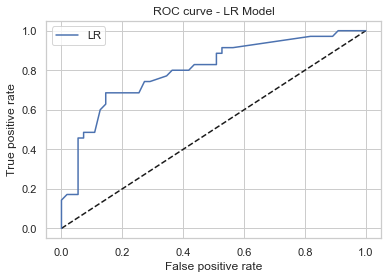

In [613]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [614]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8005194805194805

# Part 4: Feature Importance

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in

In [519]:
X_with_corr = pd.DataFrame(X_train)
X_with_corr.head()

,Sex,Age,Family,is_Alone,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Ccode,Tcode,Oname,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
453,1,0.6125,1,0,0,0,0,1,0,0,2,4,0,0,0,0,0
476,1,0.4250,1,0,0,0,1,0,0,0,7,4,0,1,0,0,1
335,1,0.4125,0,1,1,0,0,0,0,0,7,4,0,0,1,0,1
268,0,0.7250,1,0,0,0,0,0,1,0,2,5,1,0,0,0,1
607,1,0.3375,0,1,0,0,0,1,0,0,7,4,0,0,0,0,1


In [520]:
# add L1 regularization to logistic regression
# check the coef for feature selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.01, solver='liblinear')
LRmodel_l1.fit(X_l1, y_train)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Sex : -0.6118
Pclass_3 : -0.0397
Fare_4 : 0.0
Age : 0.0
Family : 0.0
is_Alone : 0.0
Fare_1 : 0.0
Fare_2 : 0.0
Fare_3 : 0.0
Embarked_S : 0.0
Embarked_Q : 0.0
Fare_6 : 0.0
Ccode : 0.0
Tcode : 0.0
Oname : 0.0
Pclass_2 : 0.0
Fare_5 : 0.0


In [521]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y_train)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Sex : -1.0722
Age : -0.536
Family : -0.5119
Pclass_3 : -0.4575
Ccode : -0.3462
Oname : 0.3378
Fare_6 : 0.2358
Fare_4 : 0.1914
Fare_2 : -0.142
is_Alone : -0.1088
Fare_1 : -0.0933
Tcode : 0.0925
Embarked_Q : 0.0728
Embarked_S : -0.0675
Fare_5 : 0.0396
Fare_3 : -0.0143
Pclass_2 : -0.0063


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [522]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_train.shape[1]):
    print ("{0} : {1}".format(pd.DataFrame(X_train).columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2865
Sex : 0.2557
Ccode : 0.094
Family : 0.0794
Pclass_3 : 0.0567
Oname : 0.0506
Tcode : 0.0474
Embarked_S : 0.0267
Fare_4 : 0.0181
Pclass_2 : 0.016
Fare_2 : 0.0148
Fare_3 : 0.0143
Fare_5 : 0.0116
is_Alone : 0.0112
Fare_1 : 0.0082
Embarked_Q : 0.0071
Fare_6 : 0.0019


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [523]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [524]:
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Survived
0,4.058564,0.190724,0.0
1,-1.004129,0.290844,1.0
2,-1.197616,-0.983932,1.0
3,4.112831,0.125818,1.0
4,-0.907635,-0.834218,NaN


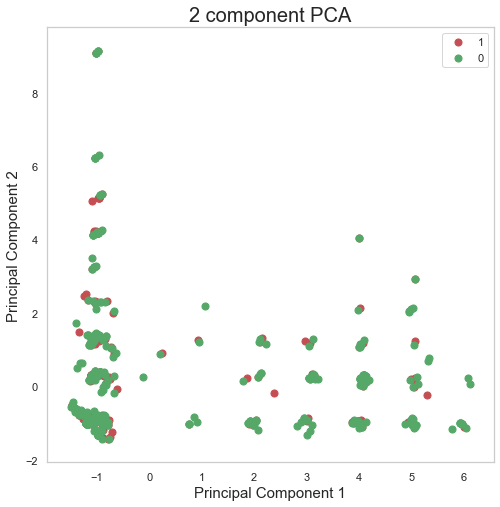

In [525]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Survived'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [526]:
pca.explained_variance_ratio_

array([0.43047866, 0.27516394])

# Part 5: Final Prediction

In [615]:
df2 = pd.read_csv('test.csv')

In [616]:
df2['Family'] = df2['SibSp'] + df2['Parch']
df2['is_Alone'] = (df2['Family'] == 0).astype(int)

In [617]:
# categorize fare into groups
df2['Fare_1'] = (df2['Fare'] <= 7.99).astype(int)
df2['Fare_2'] = ((df2['Fare'] > 7.99) & (df2['Fare'] <= 14.99)).astype(int)
df2['Fare_3'] = ((df2['Fare'] > 14.99) & (df2['Fare'] <= 29.99)).astype(int)
df2['Fare_4'] = ((df2['Fare'] > 29.99) & (df2['Fare'] <= 99.99)).astype(int)
df2['Fare_5'] = ((df2['Fare'] > 99.99) & (df2['Fare'] <= 249.99)).astype(int)
df2['Fare_6'] = (df2['Fare'] > 249.99).astype(int)

In [618]:
df2['Ccode'] = df2['Cabin'].str[0]

"""
for i in range(len(df2)):
    df2['Cnumber'] = df2['Cabin'].str[1:]

for i in range(len(df2)):
    if len(str(df2['Cnumber'][i])) >= 4:
        df2['Cnumber'][i] = 'multiple'
"""

"\nfor i in range(len(df2)):\n    df2['Cnumber'] = df2['Cabin'].str[1:]\n\nfor i in range(len(df2)):\n    if len(str(df2['Cnumber'][i])) >= 4:\n        df2['Cnumber'][i] = 'multiple'\n"

In [619]:
Tcode = []
Tnumber = []
temp = []

for i in range(len(df2)):
    temp.append(df2['Ticket'][i].split())
    
for i in range(len(temp)):
    if len(temp[i]) == 1:
        temp[i] = [np.nan] + temp[i]
        
for i in range(len(temp)):
    Tcode.append(temp[i][0])
    Tnumber.append(temp[i][1])
    
# remove period in Ticket code
for i in range(len(Tcode)):
    if str(Tcode[i])[-1] == '.':
        Tcode[i] = Tcode[i][0:len(Tcode[i])-1]
    
df2['Tcode'] = Tcode
# df2['Tnumber'] = Tnumber

In [620]:
# group ticket code
for i in range(len(df2)):
    if df2['Tcode'][i] in ['A./5','A.5', 'A/S']:
        df2['Tcode'][i] = 'A/5'
    elif df2['Tcode'][i] in ['A4']:
        df2['Tcode'][i] = 'A/4'
    elif df2['Tcode'][i] in ['CA','C.A./SOTON']:
        df2['Tcode'][i] = 'C.A'
    elif df2['Tcode'][i] in ['S.C./A.4','S.C./PARIS','S.O./P.P','S.O.C','SC','SC/AH','SC/PARIS','SC/Paris','SCO/W','SO/C']:
        df2['Tcode'][i] = 'S.C'
    elif df2['Tcode'][i] in ['SOTON/O.Q','SOTON/O2','SOTON/OQ','STON/O','STON/O2']:
        df2['Tcode'][i] = 'SOTON'
    elif df2['Tcode'][i] in ['W./C', 'W/C']:
        df2['Tcode'][i] = 'C'

for i in range(len(df2)):    
    if df2['Tcode'][i] not in ['A/4','A/5','PC','C.A','S.C','SOTON','C',np.nan]:
        df2['Tcode'][i] = 'other'

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipy

In [621]:
# separate information in Name
temp2 = []
first = []
suffix = []
last = []
other = []

for i in range(len(df2)):
    temp2.append(df2['Name'][i].split(',',1))
    
# capture last names
for i in range(len(temp2)):
    last.append(temp2[i][0])
    temp2[i].pop(0)
    
remain = pd.DataFrame(temp2)[0]
temp2 = []

for i in range(len(remain)):
    temp2.append(remain[i][1:].split('.',1))
    
# capture suffix
for i in range(len(temp2)):
    suffix.append(temp2[i][0])
    temp2[i].pop(0)
    
remain = pd.DataFrame(temp2)[0]
temp2 = []

for i in range(len(remain)):
    temp2.append(remain[i][1:].split('(',1))
    
# capture first names and other names
for i in range(len(temp2)):
    if len(temp2[i]) == 1:
        temp2[i] = temp2[i] + [None]
        
for i in range(len(temp2)):
    first.append(temp2[i][0])
    other.append(temp2[i][1] != None)
    
# df2['Lname'] = last
# df2['Fname'] = first
df2['Oname'] = other
# df2['Suffix'] = suffix

In [622]:
df2['Sex'] = (df2['Sex'] == 'male')
df2['Sex'] = df2['Sex'].astype(int)
df2['Oname'] = df2['Oname'].astype(int)

agecopy = df2['Age'].copy()
m = df2['Age'].median()
d = df2['Age'].std()
age_is_null = df2['Age'].isnull().sum()
rand_age = np.random.randint(m-d, m+d, size = age_is_null)
agecopy[np.isnan(agecopy)] = rand_age
df2['Age'] = agecopy

df2["Ccode"].fillna("No Record", inplace = True)
# df2["Cnumber"].fillna("No Record", inplace = True)
df2['Ccode'] = labelencoder.fit_transform(df2['Ccode'])
# df2['Cnumber'] = labelencoder.fit_transform(df2['Cnumber'])

df2["Tcode"].fillna("No Record", inplace = True)
# df2["Tnumber"].fillna("No Record", inplace = True)
df2['Tcode'] = labelencoder.fit_transform(df2['Tcode'])
# df2['Tnumber'] = labelencoder.fit_transform(df2['Tnumber'])

# df2['Lname'] = labelencoder.fit_transform(df2['Lname'])
# df2['Fname'] = labelencoder.fit_transform(df2['Fname'])
# df2['Suffix'] = labelencoder.fit_transform(df2['Suffix'])

df2["Embarked"].fillna('S', inplace = True) 
df2["Fare"].fillna(df2["Fare"].mean(), inplace = True) 

In [623]:
# categorize age into groups
df2['Age_1'] = (df2['Fare'] <= 18).astype(int)
df2['Age_2'] = ((df2['Fare'] > 18) & (df2['Fare'] <= 28)).astype(int)
df2['Age_3'] = ((df2['Fare'] > 28) & (df2['Fare'] <= 38)).astype(int)
df2['Age_4'] = ((df2['Fare'] > 38) & (df2['Fare'] <= 58)).astype(int)
df2['Age_5'] = (df2['Fare'] > 58).astype(int)

In [624]:
df2 = pd.get_dummies(df2, columns=['Pclass', 'Embarked'], drop_first=True)
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Age'], axis=1)

In [625]:
df2.isnull().sum()

Sex           0
Family        0
is_Alone      0
Fare_1        0
Fare_2        0
Fare_3        0
Fare_4        0
Fare_5        0
Fare_6        0
Ccode         0
Tcode         0
Oname         0
Age_1         0
Age_2         0
Age_3         0
Age_4         0
Age_5         0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [626]:
df2.head(10)

,Sex,Family,is_Alone,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Ccode,...,Oname,Age_1,Age_2,Age_3,Age_4,Age_5,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,1,1,0,0,0,0,0,7,...,0,1,0,0,0,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,7,...,1,1,0,0,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0,0,7,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,1,0,0,0,0,7,...,0,1,0,0,0,0,0,1,0,1
4,0,2,0,0,1,0,0,0,0,7,...,1,1,0,0,0,0,0,1,0,1
5,1,0,1,0,1,0,0,0,0,7,...,0,1,0,0,0,0,0,1,0,1
6,0,0,1,1,0,0,0,0,0,7,...,0,1,0,0,0,0,0,1,1,0
7,1,2,0,0,0,1,0,0,0,7,...,0,0,0,1,0,0,1,0,0,1
8,0,0,1,1,0,0,0,0,0,7,...,1,1,0,0,0,0,0,1,0,0
9,1,2,0,0,0,1,0,0,0,7,...,0,0,1,0,0,0,0,1,0,1


In [627]:
best_RF_model.predict(df2)

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [633]:
sum(best_RF_model.predict(df2)) / len(best_RF_model.predict(df2))

0.3684210526315789

In [560]:
df_final = pd.read_csv('gender_submission.csv')

In [640]:
df_final['Survived'] = best_LR_model.predict(df2)

In [641]:
df_final.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [642]:
df_final.to_csv('gender_submission.csv', index = False)